In [2]:
# Standard
import numpy as np
from numpy.random import randn
import pandas as pd
# Stats
from scipy import stats
# Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Command so that plots appear in the notebook
%matplotlib inline

Kernel Density Estimation Plots (KDE Plots) vs Histograms
https://towardsdatascience.com/histograms-vs-kdes-explained-ed62e7753f12

In [4]:
# Making a basic rug plot, puts a tick wherever a value occurs
dataset = randn(25)

(0.0, 1.0)

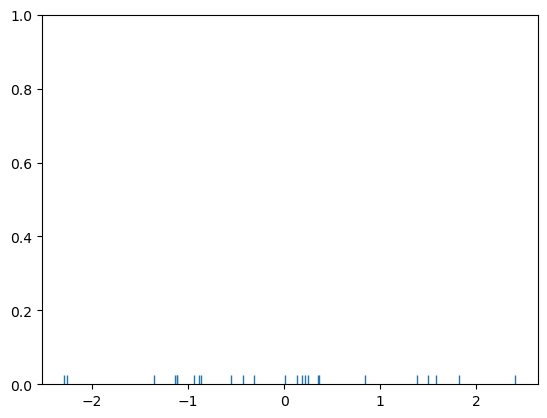

In [5]:
sns.rugplot(dataset)
plt.ylim(0,1)

<AxesSubplot:>

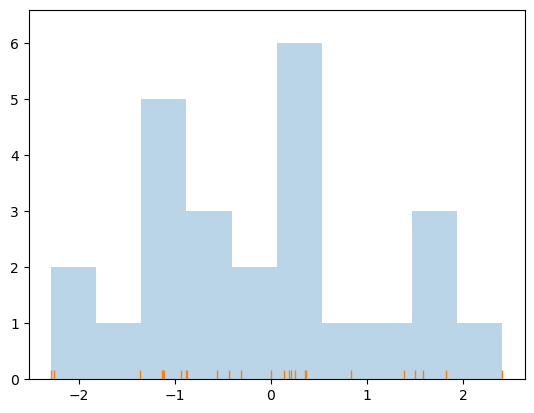

In [6]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

A histogram is counting how many values (ticks) are in bin and making the bar that high

(0.0, 1.0)

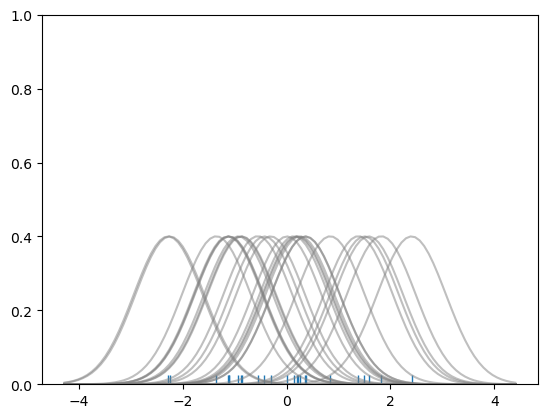

In [7]:
# Making a KDE from scratch with Gaussian as its kernel 
# KDE will represent each of the tick marks with a guassian basis function
sns.rugplot(dataset)
x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min, x_max, 100)
# Guassian basis function for the bandwidth
bandwidth = ((4*dataset.std()**5) / (3 * len(dataset))) **0.2
# that Gaussian function will be set to each point, so we need a list for each of those points
kernel_list = []

for data_point in dataset:
    # Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)
    
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

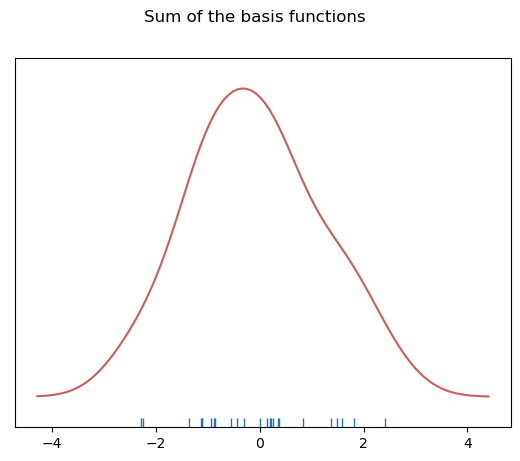

In [8]:
# To finish the KDE we need to sum all of the points
sum_of_kde = np.sum(kernel_list, axis = 0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle('Sum of the basis functions')

<AxesSubplot:ylabel='Density'>

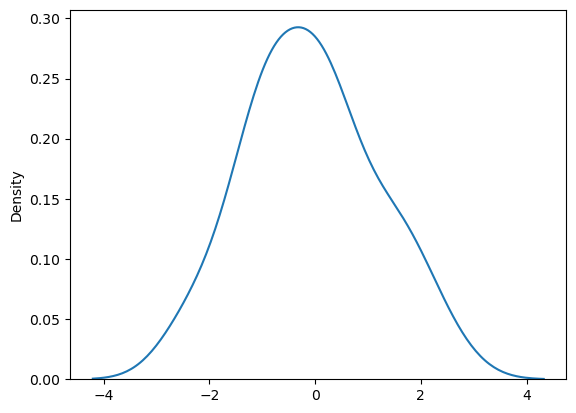

In [9]:
# How to do the KDE plot using seaborns
sns.kdeplot(dataset)

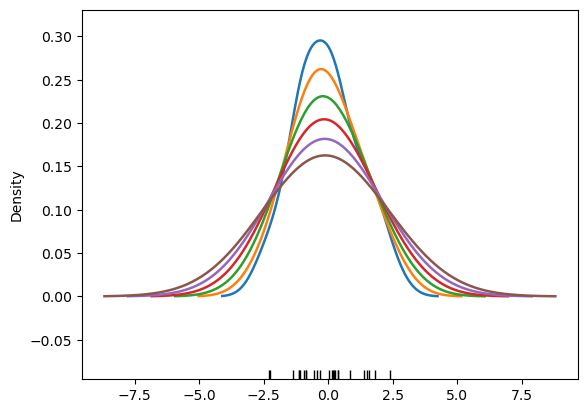

In [32]:
# Adjusting the seaborns bandwidth to be less/more responsive to frequency
sns.rugplot(dataset, color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw_method=bw,lw=1.8,label=bw)

C:\Users\eugen\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\eugen\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\eugen\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\eugen\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\eugen\anaconda3\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\eugen\anaconda3\lib\site-packag

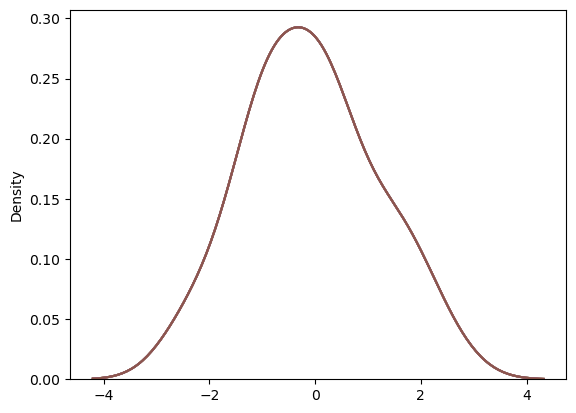

In [12]:
# More info on types of kernels
url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

# You can use different kernels in KDE's 
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

#Support for kernel types has been removed

<AxesSubplot:xlabel='Density'>

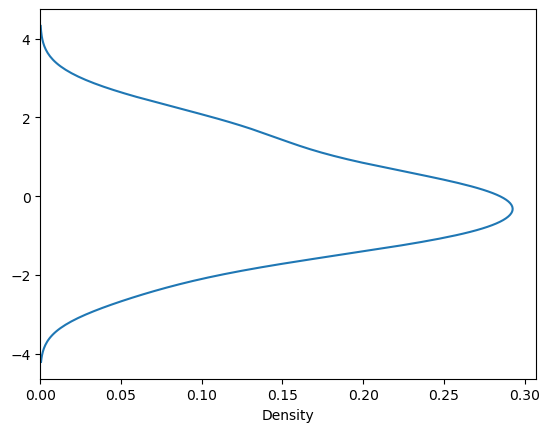

In [14]:
# Plotting on the y-axis, vertical will be deprecated, Assign data to the y-variable instead
sns.kdeplot(y=dataset)

<AxesSubplot:ylabel='Density'>

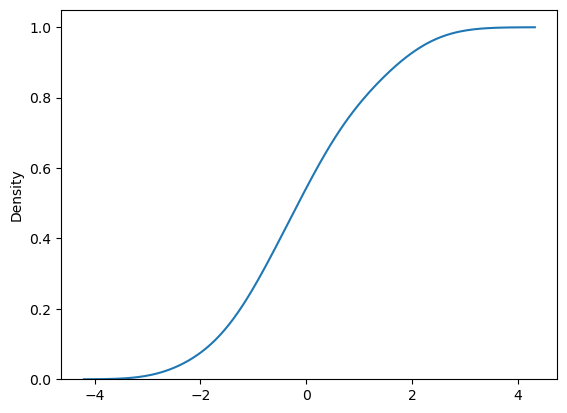

In [17]:
# Finally we can also use kde plot to create a cumulative distribution function (CDF) of the data
# Probability that you can find the value x in the distribution
# URL for info on CDF
url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'
sns.kdeplot(dataset,cumulative = True)

<AxesSubplot:>

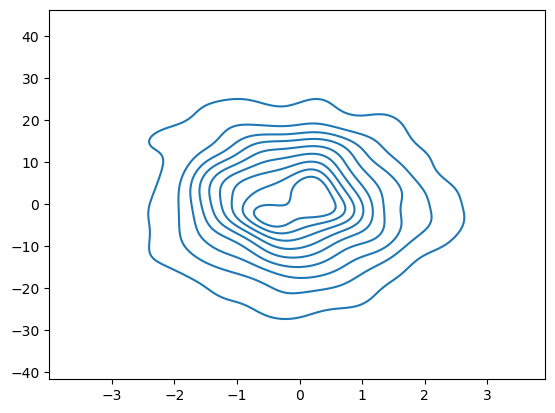

In [23]:
# KDE plot for multidimensional data, multivariate density estimation
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

dframe = pd.DataFrame(dataset2,columns=['X','Y'])
x = dframe['X'].array
y = dframe['Y'].array

sns.kdeplot(x=x,y=y)
#Using seaborns in perfect sync with a pandas dframe

<AxesSubplot:>

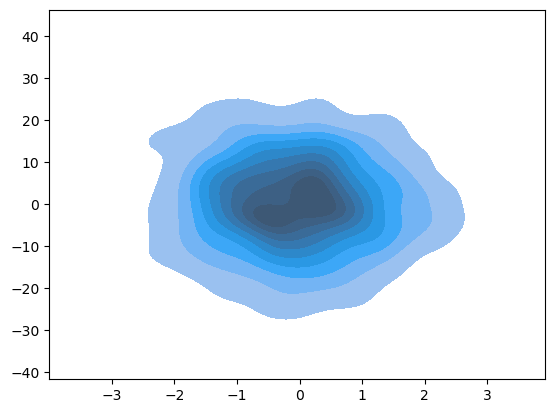

In [24]:
sns.kdeplot(x=x,y=y,shade=True)

<AxesSubplot:>

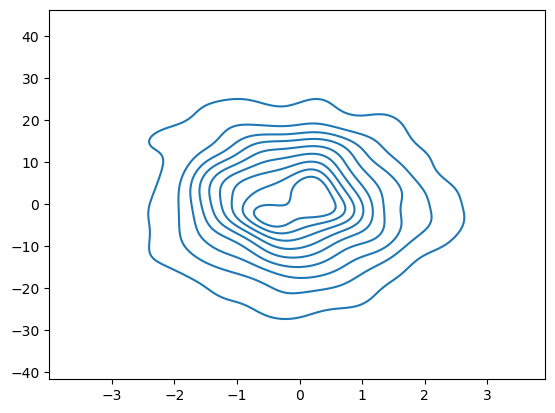

In [34]:
sns.kdeplot(x=x,y=y,bw_method='silverman')

C:\Users\eugen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


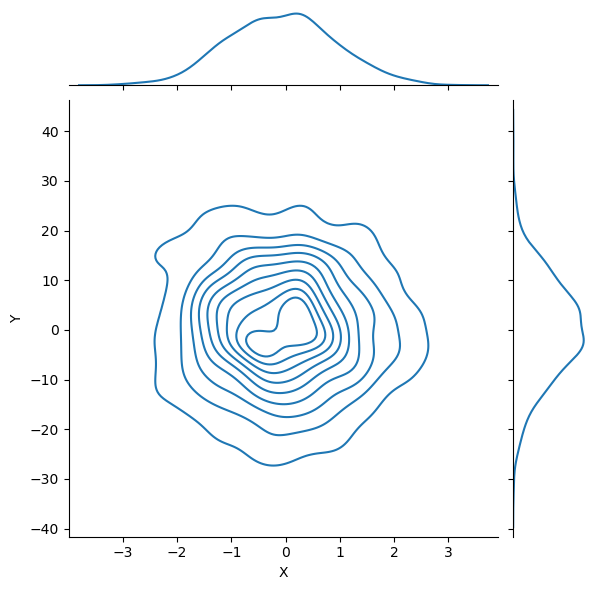

In [37]:
# Creating a kde joint plot
sns.jointplot('X','Y',dframe, kind='kde')